In [36]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

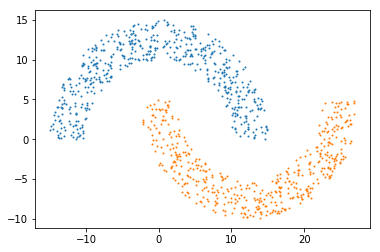

In [37]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [38]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

# Normal Perceptron Learning Algorithm - - Part (a)

In [39]:
#Normal Perceptron Learning Algorithm
class NormalPerceptron(object):
    def __init__(self, XnormalPerceptron, ynormalPerceptron):
        self.X = XnormalPerceptron
        self.d = ynormalPerceptron
        self.W = np.zeros(len(XnormalPerceptron[0]))
        self.update = 0
       
    def predict(self, x):
        activation = np.dot(self.W.T,x)
        return np.sign(activation)
    
    def fit(self):
        count = 0
        while True:
            self.update = 0
            for i in range(len(self.X)):
                predicted_value_y = self.predict(self.X[i])
                expected_value = self.d[i]
                if expected_value * predicted_value_y <=0:
                    self.W = self.W + expected_value * self.X[i]
                    count += 1
                    self.update += 1
                    break
            if self.update == 0:
                break
        return count

# If we run PLA it will not converge as the data is not separable linearly hence it timeouts or overflows - - Part (a)

In [176]:
#Part b where count is the number of updates before converging
XnormalPerceptron = np.array(data)[:,0:3]
ynormalPerceptron = np.array(data)[:, 3:4]
#Initializing Perceptron Learning Algorithm
normalPerceptron = NormalPerceptron(XnormalPerceptron,ynormalPerceptron)

#Running Perceptron Learning Algorithm
normalPerceptron.fit()

#Printing converged weight vector with count
print(normalPerceptron.W)

KeyboardInterrupt: 

# New one update perceptron learning algorithm -- Part (b)

In [40]:
#New Perceptron Learning Algorithm terminating after one update for pocket algorithm
#OUP = One Update Perceptron
class OneUpdatePerceptron(object):
    def __init__(self, XOUP, yOUP):
        self.W = np.zeros(len(XOUP[0]))
        self.X = XOUP
        self.d = yOUP
    
    def predict(self, x):
        activation = np.dot(self.W.T,x)
        return np.sign(activation)
    
    def fit(self):
        flag = True
        
        while flag:
            for i in range(len(self.X)):
                predicted_value_y = self.predict(self.X[i])
                expected_value = self.d[i]
                if expected_value * predicted_value_y <=0:
                    self.W = self.W + expected_value * self.X[i]
                    flag = False
                    break
        return self.W

# Pocket Algorithm - Part (b)

In [41]:
#Pocket Algorithm

class Pocket(object):
    def __init__(self, XPocket, yPocket, iteration=100000):
        self.X = XPocket
        self.d = yPocket
        self.Wmin = np.zeros(len(XPocket[0]))
        self.Wtemp = np.zeros(len(XPocket[0]))
        self.iteration = iteration
        self.Ein = self.getEin(self.Wmin)
        
        self.iteration_list = []
        self.ein_list = []
        
    def predict(self, x, W):
        return np.sign(np.dot(W.T,x))
        
    def getEin(self, W):
        #print(W)
        #print(self.X)
        errorCount = 0
        length = len(self.X)
        for i in range(length):
            if self.d[i] != self.predict(self.X[i], W):
                errorCount += 1
        return errorCount/length
                

    def fit(self):
        oneUpdatePerceptron = OneUpdatePerceptron(self.X, self.d)
        for i in range(self.iteration):
            #get current Ein with Wtemp
            self.Wtemp = oneUpdatePerceptron.fit()
            current_ein = self.getEin(self.Wtemp)
            
            #compare it with the minimum error stored with us
            if current_ein < self.Ein:
                # if better (less error) the update Wmin and Ein else do nothing
                self.Wmin = self.Wtemp
                self.Ein = current_ein
            self.iteration_list.append(i)
            self.ein_list.append(self.Ein)
            #print(self.Ein)
        return self.Wmin, self.iteration_list, self.ein_list
                
                

In [42]:
XPocket = np.array(data)[:,0:3]
yPocket = np.array(data)[:, 3:4]
pocket = Pocket(XPocket, yPocket)
weight, iteration_list, ein_list = pocket.fit()
print(weight)


[ 6.         -7.71410123 37.44428602]


# Plotting Ein vs iterations(100000) - Part (b)

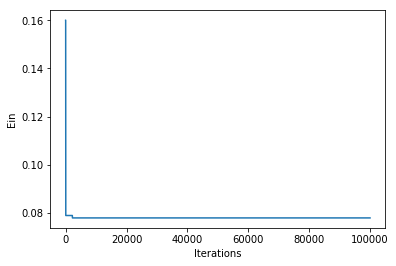

In [43]:
plt.plot(iteration_list, ein_list) #plotting hypothesis
plt.xlabel("Iterations");
plt.ylabel("Ein");
plt.show()

# Plotting with Pocket Algorithm - - Part (c)

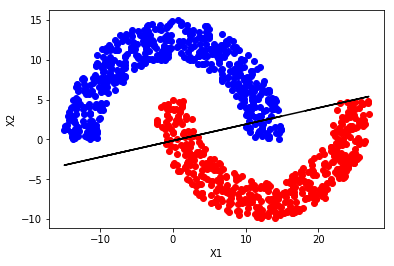

In [44]:
plt.plot(X1, Y1, 'bo')
plt.plot(X2, Y2, 'ro')
x = np.array(data)[:,0:3]
plt.plot(x, ((-weight[0]-weight[1]*x))/weight[2], color='black', linestyle='-') #plotting hypothesis
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

# Linear Regression Algorithm - - Part (d)

In [45]:
#Linear Regression Algorithm
class LinearRegression(object):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.W_lin = np.zeros(len(X[0]))
        self.X_pinv = np.zeros(len(X[0]))
        
    def fit(self):
        self.X_pinv = np.linalg.pinv(self.X)
        self.W_lin = np.dot(self.X_pinv, self.y)
        print("Weight Vector in Linear Regression: ", self.W_lin)

In [46]:
X = np.array(data)[:,0:3]
y = np.array(data)[:, 3:4]
lr = LinearRegression(X, y)
lr.fit()

Weight Vector in Linear Regression:  [[-0.05895664]
 [-0.02337265]
 [ 0.09984532]]


# Plotting with Linear Regression weight vector - Part (d)

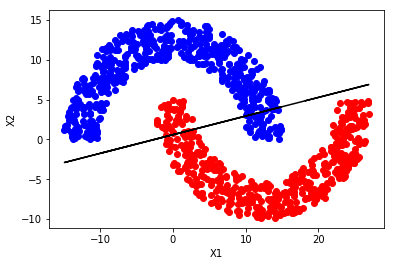

In [47]:
plt.plot(X1, Y1, 'bo')
plt.plot(X2, Y2, 'ro')
x = np.array(data)[:,0:3]
plt.plot(x, ((-lr.W_lin[0]-lr.W_lin[1]*x))/lr.W_lin[2], color='black', linestyle='-') #plotting hypothesis
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

# Third order polynomial feature transform - Part (e)

In [48]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3
X_new = np.array(data)[:,1:3]
poly = PolynomialFeatures(degree)
X_transformed = poly.fit_transform(X_new)
y_same = np.array(data)[:, 3:4]


pocket = Pocket(X_transformed, y_same)
weight_transformed, iteration_list_transformed, ein_list_transformed = pocket.fit()
print("Weight Vector from Pocket for X with third degree feature transformation",weight_transformed)

Weight Vector from Pocket for X with third degree feature transformation [-81023.          19917.57517258  -7557.94527346 118250.47922652
  73884.57046574 -56472.04334288  -8696.68457444   6877.94935573
   4881.08375168   7628.72533292]


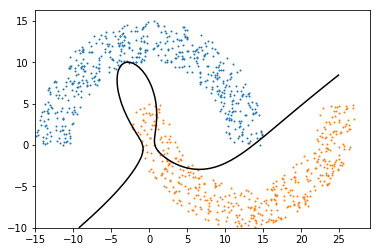

In [49]:
#https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle followed this for plotting
w = weight_transformed
xlist = np.linspace(-15.0, 25.0,100)
ylist = np.linspace(-10.0, 15.0,100) 
X,Y = np.meshgrid(xlist, ylist) 
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*Y*Y 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

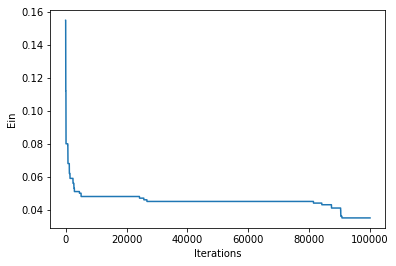

In [50]:
plt.plot(iteration_list_transformed, ein_list_transformed) #plotting hypothesis
plt.xlabel("Iterations");
plt.ylabel("Ein");
plt.show()

# Weight vector after third order feature transform

In [18]:

lr = LinearRegression(X_transformed, y_same)
lr.fit()

Weight Vector in Linear Regression:  [[-8.62638662e-01]
 [ 2.25265072e-02]
 [ 1.39600402e-01]
 [ 8.32107857e-03]
 [ 1.18871136e-02]
 [ 1.47145040e-02]
 [-3.79503278e-04]
 [-5.61904974e-04]
 [-1.09483578e-03]
 [-1.10467351e-03]]


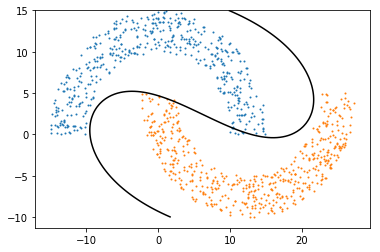

In [26]:
w = lr.W_lin
xlist = np.linspace(-15.0, 25.0,100)
ylist = np.linspace(-10.0, 15.0,100) 
X,Y = np.meshgrid(xlist, ylist) 
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*Y*Y
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()